In [52]:
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
from sklearn.metrics import mean_absolute_error

In [55]:
import numpy as np

In [56]:
import pandas as pd

In [57]:
import matplotlib.pyplot as plt

In [58]:
import seaborn as sns

In [59]:
from numpy import random

In [60]:
from datetime import datetime, timedelta

In [ ]:
source: knowledge from class practcal work 

# question2

In [61]:
student_df = pd.read_csv('student_performance_data.csv')#loading data
student_df

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...,...
495,496,Male,22,37,76.61,2.97,Science,No,No
496,497,Male,23,11,56.29,3.20,Science,No,No
497,498,Female,20,6,56.64,3.20,Science,No,Yes
498,499,Male,22,18,57.18,2.05,Business,No,Yes


# (a)

In [64]:
study_hours_major = student_df.groupby(['Gender', 'Major'])['StudyHoursPerWeek'].sum()
highest_study_hours_major = study_hours_major.groupby('Gender').idxmax()
highest_study_hours_major_values = study_hours_major.groupby('Gender').max()

print("Highest Study Hours Major:")
print(highest_study_hours_major)
print(highest_study_hours_major_values)


Highest Study Hours Major:
Gender
Female    (Female, Business)
Male       (Male, Education)
Name: StudyHoursPerWeek, dtype: object
Gender
Female    1229
Male      1212
Name: StudyHoursPerWeek, dtype: int64


# (b)

In [65]:
# Group by Gender and Major, then sum study hours
study_hours_major = student_df.groupby(['Gender', 'Major'])['StudyHoursPerWeek'].sum()
highest_study_hours_major = study_hours_major.groupby('Gender').idxmax()
highest_study_hours_major_values = study_hours_major.groupby('Gender').max()

print("Highest total study hours by major for each gender:")
print(highest_study_hours_major)
print(highest_study_hours_major_values)


Highest total study hours by major for each gender:
Gender
Female    (Female, Business)
Male       (Male, Education)
Name: StudyHoursPerWeek, dtype: object
Gender
Female    1229
Male      1212
Name: StudyHoursPerWeek, dtype: int64


# (c)

In [66]:
part_time_job_counts = student_df['PartTimeJob'].value_counts(normalize=True) * 100

print("Percentage of Students with Part-Time Jobs:")
print(part_time_job_counts)


Percentage of Students with Part-Time Jobs:
PartTimeJob
Yes    53.6
No     46.4
Name: proportion, dtype: float64


# (d)

In [69]:
mean_gpa_variance_age = student_df.groupby('Gender').agg({'GPA': 'mean', 'Age': 'var'})

print("Mean GPA and Age Variance by Gender:")
print(mean_gpa_variance_age)


Mean GPA and Age Variance by Gender:
             GPA       Age
Gender                    
Female  2.995352  4.005637
Male    2.974467  3.960130


# (e)

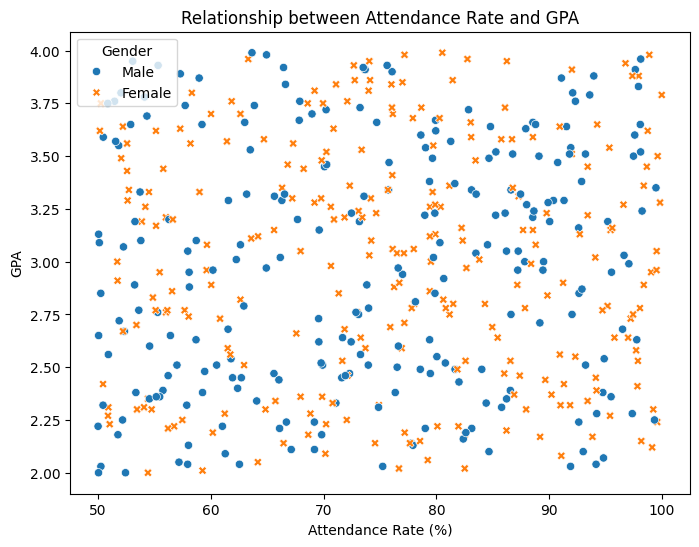

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=student_df, x='AttendanceRate', y='GPA', hue='Gender', style='Gender')
plt.title('Relationship between Attendance Rate and GPA')
plt.xlabel('Attendance Rate (%)')
plt.ylabel('GPA')
plt.legend(title='Gender')
plt.show()


In [ ]:
# source: On this question i also used three sources
1.simple linear regression notes you shared with us on the email and my summary i took during the clas
2.w3schools
3.Yuli Vasiliev,python for Data Science:https//www.oreilly.com/library/view/python-for-data/97810981333330275

# question3

In [43]:
data = pd.read_excel('Wages 2020Census cleaned.xlsx')#
data

,Age,Sex,Marital_status,Number_of_children,Family_size,Education-degree_recode,Education-degree_recode 2,Education,Race_ethnicity-multi_recode,Immigrate-year,Birthplace_recode,Speaks_English,Employment_status,Income-wages,Region_recode,Region-division_recode,Moved,Year,state
0,30,Male,"Married, spouse present",2,4,Masterâ€™s or professional degree,Master or professional degree,Master or PhD or professional degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,63000,South,East South Central,Same house,2020,Tennessee
1,28,Female,"Married, spouse present",1 child present,3,Masterâ€™s or professional degree,Master or professional degree,Master or PhD or professional degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,46000,South,East South Central,Same house,2020,Tennessee
2,34,Male,"Married, spouse present",1 child present,3,Bachelorâ€™s degree,Bachelor degree,Associate or Bachelor degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,45000,South,East South Central,Same house,2020,Tennessee
3,58,Female,"Married, spouse absent",1 child present,2,"1 or more years of college, no degree","1 or more years of college, no degree","1 or more years of college, no degree",Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,55000,South,East South Central,Same house,2020,Tennessee
4,39,Male,Never married/single,0 children present,1,Bachelorâ€™s degree,Bachelor degree,Associate or Bachelor degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,12000,South,East South Central,Same house,2020,Tennessee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,67,Male,"Married, spouse present",0 children present,2,Bachelorâ€™s degree,Bachelor degree,Associate or Bachelor degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,40000,Midwest,West North Central,Same house,2020,North Dakota
4361,48,Male,"Married, spouse present",4,6,Associateâ€™s degree,Associate degree,Associate or Bachelor degree,Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,65000,Midwest,West North Central,Same house,2020,North Dakota
4362,33,Male,"Married, spouse absent",0 children present,1,Associateâ€™s degree,Associate degree,Associate or Bachelor degree,Non-Hispanic Black,2017,Africa,"Yes, speaks very well",Employed,45000,Midwest,West North Central,Same house,2020,North Dakota
4363,22,Female,Never married/single,0 children present,2,"1 or more years of college, no degree","1 or more years of college, no degree","1 or more years of college, no degree",Non-Hispanic White,0,"U.S. state, territory, or outlying region","Yes, speaks only English",Employed,500,Midwest,West North Central,Same house,2020,North Dakota


# (a)Steps involved in fitting a linear regression in Python

Import Libraries: Use libraries such as pandas, numpy, and sklearn.
Load Dataset: Load the dataset into a DataFrame using pandas.read_csv.
Select Variables: Choose the dependent variable (e.g., Income-wages) and an independent variable (e.g., Age).
Preprocess Data: Handle missing values and ensure numerical encoding of categorical variables.
Split Dataset: Divide data into training and testing sets using train_test_split.
Train Model: Use LinearRegression() from sklearn.linear_model and fit the model with model.fit(X_train, y_train).
Evaluate Model: Predict using model.predict(X_test) and calculate metrics such as MAE or MSE.

# 

# (b)  Assumptions of Linear Regression

Linearity: The relationship between the independent variable and the dependent variable is linear.
Independence: Observations are independent, and errors are not autocorrelated.
Homoscedasticity: Variance of errors (residuals) is constant across all levels of the independent variable.
Normality: Residuals follow a normal distribution.

# (c) Train a simple linear regression model 

In [45]:

# Select independent and dependent variables
X = data[['Age']]  # Independent variable
y = data['Income-wages']  # Dependent variable

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate equation
intercept = model.intercept_
coef = model.coef_[0]
print(f"Regression Equation: y = {intercept:.2f} + {coef:.2f}x")


Regression Equation: y = 20242.34 + 939.96x


# (d)  Compute the Mean Absolute Error (MAE)

In [46]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 36284.38


# (e) Extract and Interpret Key Outputs

# (f) Plot the Linear Regression Model

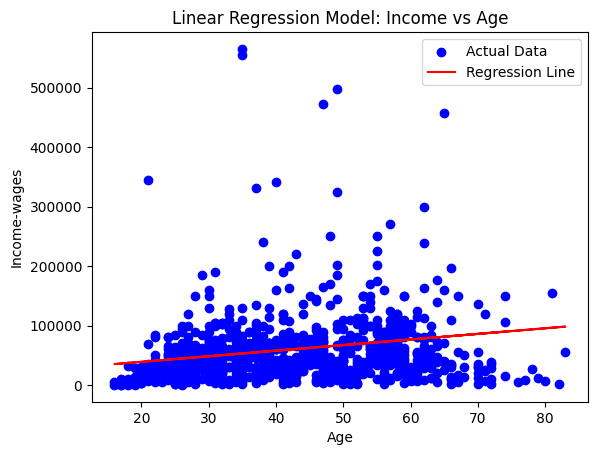

In [48]:
# Scatter plot of actual values
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.xlabel('Age')
plt.ylabel('Income-wages')
plt.title('Linear Regression Model: Income vs Age')
plt.legend()
plt.show()


In [ ]:
#  source:i got my answers from two sources on this question, 
1.stack overflow 
2.practicles we did in class

# question1

# (a)

In [49]:
#To determine the "typical" yearly income, we use measures of central tendency such as the mean and median
typical_income_mean = data['Income-wages'].mean()#The mean represents the average yearly income
typical_income_median = data['Income-wages'].median()#The median is the middle income value, which is more robust to outliers
print(f"Mean Income: ${typical_income_mean:.2f}")
print(f"Median Income: ${typical_income_median:.2f}")

Mean Income: $58704.16
Median Income: $41000.00


# (b)

In [50]:
#If the SD or IQR is significantly greater than 0, incomes vary.
#A histogram or boxplot can also visualize income distribution
std_dev = data['Income-wages'].std()
iqr = data['Income-wages'].quantile(0.75) - data['Income-wages'].quantile(0.25)
print(f"Standard Deviation: ${std_dev:.2f}")
print(f"IQR: ${iqr:.2f}")


Standard Deviation: $68338.06
IQR: $49000.00


# (c)

In [51]:
no_variability_std_dev = 0 #no variability, standard deviation and IQR are both 0
no_variability_IQR = 0
print(f'Standard deviation with no variability: {no_variability_std_dev}')
print(f'no_variability_IQR with no variability: {no_variability_IQR}')

Standard deviation with no variability: 0
no_variability_IQR with no variability: 0


# (d)

In [25]:
no_variability_mean = data['Income-wages'].mean()
no_variability_median = data['Income-wages'].median()
no_variability_min = data['Income-wages'].min()
no_variability_max = data['Income-wages'].max()
no_variability_Q1 = data['Income-wages'].quantile(0.25)
no_variability_Q3 = data['Income-wages'].quantile(0.75)
print(f'Mean income: ${no_variability_mean:,.2f}')
print(f'Median income: ${no_variability_median:,.2f}')
print(f'Min income: ${no_variability_min:,.2f}')
print(f'Max income: ${no_variability_max:,.2f}')
print(f'Q1 income: ${no_variability_Q1:,.2f}')
print(f'Q3 income: ${no_variability_Q3:,.2f}')

Mean income: $58,704.16
Median income: $41,000.00
Min income: $30.00
Max income: $661,000.00
Q1 income: $22,000.00
Q3 income: $71,000.00


# (e)

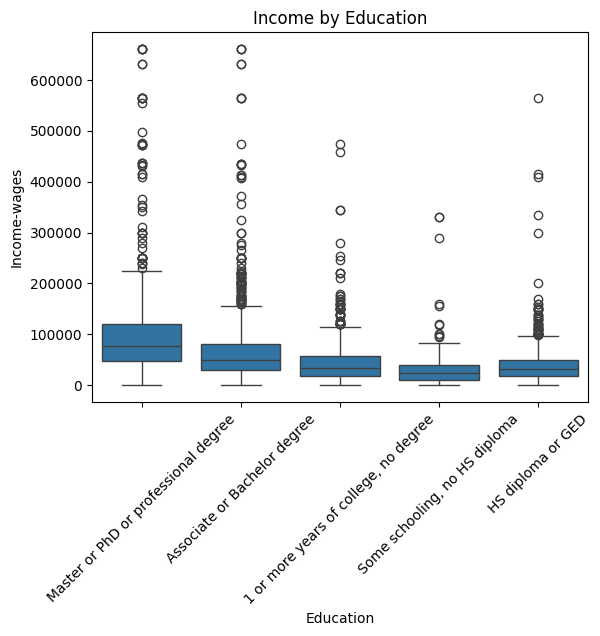

In [29]:
sns.boxplot(data=data, x='Education', y='Income-wages')
plt.title('Income by Education')
plt.xticks(rotation=45)
plt.show()


In [31]:
education_income_stats = data.groupby('Education')['Income-wages'].describe()
region_income_stats = data.groupby('Region-division_recode')['Income-wages'].describe()
print('Income statistics by Education Level:')
print(education_income_stats)
print('\nIncome statistics by Region:')
print(region_income_stats)

Income statistics by Education Level:
                                        count           mean            std  \
Education                                                                     
1 or more years of college, no degree   940.0   43912.872340   43801.946631   
Associate or Bachelor degree           1521.0   66324.260355   68490.580580   
HS diploma or GED                       990.0   39983.646465   39070.521919   
Master or PhD or professional degree    613.0  106567.928222  108705.990391   
Some schooling, no HS diploma           301.0   30486.478405   37496.119642   

                                         min      25%      50%       75%  \
Education                                                                  
1 or more years of college, no degree  180.0  17500.0  34400.0   58000.0   
Associate or Bachelor degree           300.0  30000.0  50000.0   80000.0   
HS diploma or GED                       30.0  18000.0  32000.0   50000.0   
Master or PhD or professiona

In [ ]:
# source: from mathematic computing practical and the notebook you shared to us 

# question4

# (a)

In [35]:
# multiply a 5 x 3 matrix by a 3 x 2 matrix

# create a 5 x 3 matrix

In [36]:
A = np.random.randint(1,10, size=(5,3))
A

array([[4, 9, 2],
       [2, 5, 1],
       [5, 1, 9],
       [3, 9, 5],
       [4, 3, 6]], dtype=int32)

# create a 3 x 2 matrix

In [37]:
B = np.random.randint(1,10, size = (3,2))# 3 is the number of rows and 2 stands for number of columns of the matrix
B

array([[2, 2],
       [8, 6],
       [2, 2]], dtype=int32)

In [38]:
print(np.dot(A,B)) 

[[84 66]
 [46 36]
 [36 34]
 [88 70]
 [44 38]]


# (b)

In [39]:
# Create a 3 x 3 identity matrix

In [40]:
identity_matrix = np.eye(3)# in order to find identity matrix i have to use .eye
identity_matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# (c)

In [41]:
#vector with values ranging from 10 to 49

In [42]:
vector = np.arange(10, 50)
print("Vector ranging from 10 to 49:")
print(vector)

Vector ranging from 10 to 49:
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


# (d)

# create a null vector of size 10

In [43]:
null_vector =np.zeros(10)
null_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# (e)

# create a 3 x 3 x 3 matrix with random values

In [44]:
random_array = np.random.random((3, 3, 3))
print("3x3x3 array with random values:")
print(random_array)

3x3x3 array with random values:
[[[0.3437496  0.02697653 0.01507321]
  [0.94453907 0.70534611 0.8522346 ]
  [0.86619041 0.22942132 0.82100596]]

 [[0.9682093  0.67328247 0.17883398]
  [0.6215787  0.52706222 0.98185699]
  [0.82664799 0.98203053 0.61654754]]

 [[0.1798829  0.72506913 0.67409118]
  [0.74110838 0.16956298 0.12202371]
  [0.70521628 0.51840505 0.43103783]]]


# (f)

# Create a 5x5 matrix with values 1,2,3,4 just below the diagonal

In [45]:
matrix_with_diag = np.diag(np.arange(1, 5), k=-1)
print("5x5 matrix with values just below the diagonal:")
print(matrix_with_diag)

5x5 matrix with values just below the diagonal:
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


# (g)

# Normalize a 5x5 random matrix

In [46]:
random_matrix = np.random.random((5, 5))
normalized_matrix = (random_matrix - random_matrix.mean()) / random_matrix.std()
print("Normalized 5x5 matrix:")
print(normalized_matrix)

Normalized 5x5 matrix:
[[-0.74285289 -0.76730445  0.16606228 -1.46121046  1.53416455]
 [-1.7831509   0.41536807 -1.1639467   0.31764914  1.41016382]
 [-0.20752494  1.26793756  0.42248116  0.68614208 -0.25689122]
 [-0.92786104 -0.5647701  -1.23209637  1.71290548 -1.06701441]
 [ 0.52977269  1.52141069 -0.20588114 -0.39075909  0.78720617]]


# (h)

# Dates of yesterday, today, and tomorrow

In [47]:
today = datetime.today()
yesterday =today - timedelta(days=1)
tomorrow = today + timedelta(days=1)

print("yesterday:", yesterday.strftime('%Y-%m-%d'))
print("Today:", today.strftime('%Y-%m-%d'))
print("tomorrow:", tomorrow.strftime('%Y-%m-%d'))


yesterday: 2024-12-09
Today: 2024-12-10
tomorrow: 2024-12-11


# (I)

# Indices of non-zero elements

In [48]:
array = np.array([1,2,0,0,4,0])
non_zero = np.nonzero(array)
non_zero

(array([0, 1, 4]),)